In [232]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [233]:
wdi = pd.read_csv('/Users/gracesaunders/Downloads/World Development Indicators Jan 28 2025 (1)/WDICSV.csv')
wdi.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.488497,18.001597,18.558234,19.043572,19.586457,20.192064,20.828814,21.372164,22.100884,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.811504,7.096003,7.406706,7.666648,8.020952,8.403358,8.718306,9.097176,9.473374,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.152090,38.488233,38.779953,39.068462,39.445526,39.818645,40.276374,40.687817,41.211606,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.871956,33.922276,38.859598,40.223744,43.035073,44.390861,46.282371,48.127211,48.742043,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.672943,16.527554,24.627753,25.432092,27.061929,29.154282,31.022083,32.809138,33.760782,NaN


In [234]:
print(wdi['Country Name'].unique())

['Africa Eastern and Southern' 'Africa Western and Central' 'Arab World'
 'Caribbean small states' 'Central Europe and the Baltics'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD countries)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'Europe & Central Asia (IDA & IBRD countries)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income' 'IBRD only'
 'IDA & IBRD total' 'IDA blend' 'IDA only' 'IDA total'
 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Latin America & the Caribbean (IDA & IBRD countries)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)'
 'Middle East & North Africa (IDA & IBRD countries)

In [235]:
print(wdi['Indicator Name'].unique())

['Access to clean fuels and technologies for cooking (% of population)'
 'Access to clean fuels and technologies for cooking, rural (% of rural population)'
 'Access to clean fuels and technologies for cooking, urban (% of urban population)'
 ... 'Women who were first married by age 18 (% of women ages 20-24)'
 "Women's share of population ages 15+ living with HIV (%)"
 'Young people (ages 15-24) newly infected with HIV']


In [236]:
info = pd.read_csv('/Users/gracesaunders/Downloads/World Development Indicators Jan 28 2025 (1)/WDISeries.csv')
info.head()
print(info['Topic'].unique())

['Environment: Agricultural production' 'Environment: Land use'
 'Economic Policy & Debt: Balance of payments: Current account: Goods, services & income'
 'Economic Policy & Debt: Balance of payments: Capital & financial account'
 'Economic Policy & Debt: Balance of payments: Current account: Transfers'
 'Economic Policy & Debt: Balance of payments: Current account: Balances'
 'Economic Policy & Debt: Balance of payments: Reserves & other items'
 'Infrastructure: Communications' 'Public Sector: Policy & institutions'
 'Financial Sector: Capital markets'
 'Economic Policy & Debt: Official development assistance'
 'Economic Policy & Debt: External debt: Debt outstanding'
 'Economic Policy & Debt: External debt: Debt ratios & other items'
 'Economic Policy & Debt: External debt: Net flows'
 'Economic Policy & Debt: External debt: Debt service'
 'World Bank, International Debt Statistics.'
 'Environment: Energy production & use' 'Environment: Emissions'
 'Environment: Biodiversity & protec

In [237]:
oda = info[info['Topic'] == 'Economic Policy & Debt: Official development assistance']
oda.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type
88,DC.DAC.AUSL.CD,Economic Policy & Debt: Official development a...,"Net bilateral aid flows from DAC donors, Austr...",NaN,Net bilateral aid flows from DAC donors are th...,NaN,Annual,NaN,NaN,Sum,Data exclude DAC members’ multilateral aid (co...,NaN,NaN,Development Assistance Committee of the Organi...,The Development Assistance Committee (DAC) of ...,NaN,NaN,NaN,NaN,CC BY-4.0
89,DC.DAC.AUTL.CD,Economic Policy & Debt: Official development a...,"Net bilateral aid flows from DAC donors, Austr...",NaN,Net bilateral aid flows from DAC donors are th...,NaN,Annual,NaN,NaN,Sum,Data exclude DAC members’ multilateral aid (co...,NaN,NaN,Development Assistance Committee of the Organi...,The Development Assistance Committee (DAC) of ...,NaN,NaN,NaN,NaN,CC BY-4.0
90,DC.DAC.BELL.CD,Economic Policy & Debt: Official development a...,"Net bilateral aid flows from DAC donors, Belgi...",NaN,Net bilateral aid flows from DAC donors are th...,NaN,Annual,NaN,NaN,Sum,Data exclude DAC members’ multilateral aid (co...,NaN,NaN,Development Assistance Committee of the Organi...,The Development Assistance Committee (DAC) of ...,NaN,NaN,NaN,NaN,CC BY-4.0
91,DC.DAC.CANL.CD,Economic Policy & Debt: Official development a...,"Net bilateral aid flows from DAC donors, Canad...",NaN,Net bilateral aid flows from DAC donors are th...,NaN,Annual,NaN,NaN,Sum,Data exclude DAC members’ multilateral aid (co...,NaN,NaN,Development Assistance Committee of the Organi...,The Development Assistance Committee (DAC) of ...,NaN,NaN,NaN,NaN,CC BY-4.0
92,DC.DAC.CECL.CD,Economic Policy & Debt: Official development a...,"Net bilateral aid flows from DAC donors, Europ...",NaN,Net bilateral aid flows from DAC donors are th...,NaN,Annual,NaN,NaN,Sum,Data exclude DAC members’ multilateral aid (co...,NaN,NaN,Development Assistance Committee of the Organi...,The Development Assistance Committee (DAC) of ...,NaN,NaN,NaN,NaN,CC BY-4.0


In [238]:
import pandas as pd

In [239]:
df = pd.read_csv('/Users/gracesaunders/Downloads/World Development Indicators Jan 28 2025 (1)/WDICSV.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.488497,18.001597,18.558234,19.043572,19.586457,20.192064,20.828814,21.372164,22.100884,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.811504,7.096003,7.406706,7.666648,8.020952,8.403358,8.718306,9.097176,9.473374,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.152090,38.488233,38.779953,39.068462,39.445526,39.818645,40.276374,40.687817,41.211606,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.871956,33.922276,38.859598,40.223744,43.035073,44.390861,46.282371,48.127211,48.742043,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.672943,16.527554,24.627753,25.432092,27.061929,29.154282,31.022083,32.809138,33.760782,NaN


In [240]:
# Only years 2010-2020
df = df.loc[:,['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

# Filter rows based on column: 'Indicator Code'
indicator_codes = [
    "NY.GNP.PCAP.KD.ZG",
    "NY.GDP.MKTP.KD.ZG",
    "DT.ODA.ODAT.GN.ZS",
    "PV.PER.RNK",
    "SI.POV.SOPO",
    "SP.POP.TOTL",
    "SI.POV.GINI",
    "CC.PER.RNK"
]

df = df[df['Indicator Code'].isin(indicator_codes)]# Filter rows based on column: index

df = df[df.index >= 72281]

In [241]:
pov = df[df['Indicator Code'].str.contains("SI.POV", regex=False, na=False, case=False)]
povLong = pov.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name = 'Year',
    value_name = 'Value'
)
pov_pivot = povLong.pivot_table(
    index=['Country Name', 'Country Code', 'Year'],
    columns='Indicator Code',
    values='Value'
).reset_index()

In [242]:
pov_pivot

Indicator Code,Country Name,Country Code,Year,SI.POV.GINI,SI.POV.SOPO
0,Albania,ALB,2012,29.0,18.3
1,Albania,ALB,2014,34.6,24.9
2,Albania,ALB,2015,32.8,19.7
3,Albania,ALB,2016,33.7,21.0
4,Albania,ALB,2017,33.1,20.2
...,...,...,...,...,...
884,Zambia,ZMB,2010,52.0,64.4
885,Zambia,ZMB,2015,55.8,60.8
886,Zimbabwe,ZWE,2011,43.2,38.3
887,Zimbabwe,ZWE,2017,44.3,44.0


In [243]:
df.loc[:,"Indicator Name"].unique()

array(['GDP growth (annual %)', 'Gini index',
       'GNI per capita growth (annual %)', 'Net ODA received (% of GNI)',
       'Political Stability and Absence of Violence/Terrorism: Percentile Rank',
       'Population, total',
       'Poverty headcount ratio at societal poverty line (% of population)',
       'Control of Corruption: Percentile Rank'], dtype=object)

In [244]:
# pivot so that each indicator becomes a column
df_long = df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Value"
)

df_pivot = df_long.pivot_table(
    index=["Country Name", "Country Code", "Year"],
    columns="Indicator Name",
    values="Value"
).reset_index()

In [245]:

df_pivot = df_pivot[df_pivot['Net ODA received (% of GNI)'].notna()]

In [246]:
df_pivot.columns.tolist()

['Country Name',
 'Country Code',
 'Year',
 'Control of Corruption: Percentile Rank',
 'GDP growth (annual %)',
 'GNI per capita growth (annual %)',
 'Gini index',
 'Net ODA received (% of GNI)',
 'Political Stability and Absence of Violence/Terrorism: Percentile Rank',
 'Population, total',
 'Poverty headcount ratio at societal poverty line (% of population)']

In [247]:
# Make sure df is a copy
df = df_pivot.copy()

# 1. Define numeric columns - verify these exist in your data
numeric_cols = ['GDP growth (annual %)',
               'GNI per capita growth (annual %)',
               'Gini index',
               'Political Stability and Absence of Violence/Terrorism: Percentile Rank',
               'Population, total',
               'Poverty headcount ratio at societal poverty line (% of population)',
                'Control of Corruption: Percentile Rank']

# 2. Create missing indicators
for col in numeric_cols:
    df.loc[:, f"{col}_missing"] = df[col].isnull().astype(int)

# 3. Split into features and target
X = df.drop(["Country Name", "Country Code", "Year", "Net ODA received (% of GNI)"], axis=1)
y = df["Net ODA received (% of GNI)"]

# Verify all numeric_cols exist in X
missing_cols = set(numeric_cols) - set(X.columns)
if missing_cols:
    raise ValueError(f"Columns {missing_cols} not found in X")

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 5. Update numeric_cols to include missing indicators
all_numeric_cols = numeric_cols + [f"{col}_missing" for col in numeric_cols]

# 6. Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
            ("scaler", StandardScaler())
        ]), all_numeric_cols)
    ],
    remainder="drop"  # Explicitly drop non-numeric columns
)

# 7. Pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),
            ('scaler', StandardScaler())
        ]), numeric_cols),  # Only original numeric columns get polynomial treatment
        
        ('missing', Pipeline([
            ('scaler', StandardScaler())
        ]), [f"{col}_missing" for col in numeric_cols])  # Missing indicators treated separately
    ])),
    ('model', LassoCV(alphas=np.logspace(-4, 2, 100), cv=5, max_iter=10000))
])

# 8. Train model
pipeline.fit(X_train, y_train)

# 9. Get results

# After fitting the pipeline
best_model = pipeline.named_steps['model']
best_alpha = best_model.alpha_
print(f"Best alpha: {best_alpha}")

# Get the actual features that went into the polynomial transformer
preprocessor = pipeline.named_steps['preprocessor']
numeric_transformer = preprocessor.named_transformers_['num']

# Get the features that survived column selection
selected_features = numeric_transformer[:-1].get_feature_names_out()  # Exclude polynomial step
poly = numeric_transformer.named_steps['poly']

# Get polynomial feature names using only the features that were actually transformed
poly_feature_names = poly.get_feature_names_out(input_features=selected_features)

# Get coefficients
coefficients = best_model.coef_

# Create results DataFrame
results_df = pd.DataFrame({
    'Feature': poly_feature_names,
    'Coefficient': coefficients
})

# Filter and sort non-zero coefficients
non_zero_results = results_df[results_df['Coefficient'] != 0].copy()
non_zero_results['Abs_Coefficient'] = non_zero_results['Coefficient'].abs()
non_zero_results = non_zero_results.sort_values('Abs_Coefficient', ascending=False)

print("Non-zero Coefficients from Polynomial Features:")
print(non_zero_results[['Feature', 'Coefficient']].to_string(index=False))

Best alpha: 0.08111308307896872


ValueError: input_features should have length equal to number of features (7), got 35

In [209]:
sdf = pd.DataFrame(pipeline.named_steps["model"].coef_, index=feature_names, columns=["Coefficient"])

In [ ]:
ss

<Axes: xlabel='Coefficient', ylabel='Count'>

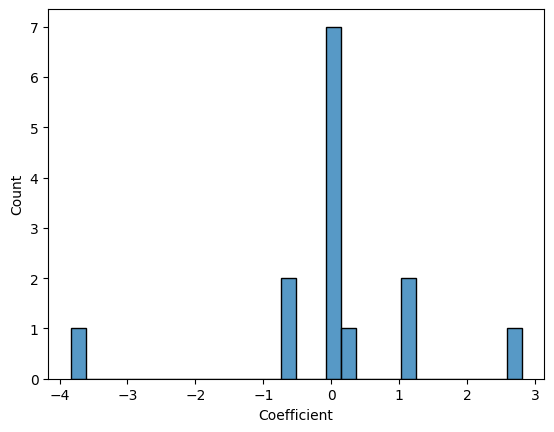

In [210]:
import seaborn as sns
sns.histplot(sdf, x="Coefficient", bins=30)